<a href="https://colab.research.google.com/github/Tatutina/HeartDisease_Project/blob/Machine_learning/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Машинное обучение

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, mannwhitneyu, ttest_ind, shapiro

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score, recall_score,
    confusion_matrix, multilabel_confusion_matrix, f1_score, roc_auc_score,
    roc_curve, average_precision_score, precision_recall_curve
)

from sklearn.linear_model import LogisticRegression    # Импорт модели логистической регрессии
from sklearn.neighbors import KNeighborsClassifier     # Импорт классификатора K-ближайших соседей
from sklearn.tree import DecisionTreeClassifier        # Импорт классификатора на основе дерева решений
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn import metrics      # Импорт всего модуля metrics для работы с метриками оценки моделей
from sklearn.metrics import  (    # Импорт конкретных функций оценки из подмодуля metrics
    accuracy_score,              # Импорт функции для оценки точности (accuracy) модели, т.е. доли правильно предсказанных примеров
    balanced_accuracy_score,     # Импорт функции для оценки сбалансированной точности, учитывающей классовую неоднородность
    precision_score,             # Импорт функции для вычисления точности (precision)
    recall_score,                # Импорт функции для вычисления полноты (recall)
    confusion_matrix,            # Импорт функции для создания матрицы ошибок (confusion matrix):TN, TP, FN, FP
    multilabel_confusion_matrix, # Импорт функции для создания матрицы ошибок для случаев с многомерной классификацией
    f1_score,                    # Импорт функции для вычисления F1-меры
    roc_auc_score,               # Импорт функции для вычисления AUC-ROC (площадь под кривой приемлемости и ошибок)
    roc_curve,                   # Импорт функции для вычисления координат для построения ROC-кривой
    average_precision_score,     # Импорт функции для вычисления средней точности (average precision)
    precision_recall_curve       # Импорт функции для вычисления и визуализации кривой "точность-полнота" (precision-recall curve)
)

In [3]:
heart_new1=pd.read_csv('/content/drive/MyDrive/HeartDisease_Project/data/heart_clean.csv')

In [4]:
heart_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ЛПНП                                    405 non-null    float64
 1   Работа                                  405 non-null    int64  
 2   Пассивное курение                       405 non-null    int64  
 3   Переломы                                405 non-null    int64  
 4   ЛПВП                                    405 non-null    float64
 5   Выход на пенсию                         405 non-null    int64  
 6   Холестерин                              405 non-null    float64
 7   Артериальная гипертония                 405 non-null    int64  
 8   Триглицериды                            405 non-null    float64
 9   Гепатит                                 405 non-null    int64  
 10  Сахарный диабет                         405 non-null    int64 

In [5]:
heart_new1.head()

,ЛПНП,Работа,Пассивное курение,Переломы,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,Гепатит,...,Алкоголь_ранее употреблял,Алкоголь_употребляю в настоящее время,Национальность_0,Национальность_1,Национальность_2,Национальность_3,Профессия_0,Профессия_1,Профессия_2,Профессия_3
0,2.79,1,0,0,0.97,0,4.0,0,0.52,0,...,0.0,1.0,0,0,0,1,0,0,0,1
1,2.74,1,1,0,0.68,0,4.9,1,3.25,0,...,0.0,1.0,0,0,0,1,0,0,0,1
2,5.37,0,1,0,0.57,1,7.8,1,4.09,0,...,0.0,1.0,0,0,1,0,0,0,0,1
3,3.77,0,0,1,0.91,1,4.9,0,0.49,0,...,0.0,1.0,0,0,0,1,0,0,0,1
4,2.42,0,0,1,1.55,0,4.2,0,0.50,0,...,0.0,1.0,0,0,0,1,0,0,1,0


* Разобьём датасет на данные для обучения и тестирования методом **train_test_split** библиотеки **Scikit-learn**

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    heart_new1.drop("ССЗ", axis=1),
    heart_new1["ССЗ"],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=heart_new1["ССЗ"]
)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((324, 38), (81, 38), (324,), (81,))

## Метрики качества для задач классификации: точность и специфичность, F1, ROC AUC, PR AUC

In [9]:
def calculate_specificity(true_labels, predictions):
    conf_matrix = confusion_matrix(true_labels, predictions)
    tn, fp, fn, tp = conf_matrix.ravel()
    specif = (tn / (tn + fp)).round(4)
    return specif, (tn, fp, fn, tp)

In [10]:
  def get_all_metrics(
    true_labels,
    predictions,
    probabilities,
    print_metrics=False,
    **kwargs
):

    kwargs_roc_auc = dict()

    probabilities = probabilities[:, 1]


    accuracy = accuracy_score(true_labels, predictions)
    balanced_accuracy=balanced_accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)

    roc_auc = roc_auc_score(true_labels, probabilities,**kwargs_roc_auc)
    pr_auc = average_precision_score(true_labels, predictions)

    specificity, conf_matrix = calculate_specificity(true_labels, predictions)


    tn, fp, fn, tp = conf_matrix

    print(
            "Accuracy = {:.4f}\nBalanced_accuracy = {:.4f}\nPrecision = {:.4f}\nRecall = {:.4f}\nF1_score = {:.4f}\nROC AUC = {:.4f}\nPR AUC = {:.4f}\nSpecificity = {:.4f}".format(
                accuracy, balanced_accuracy, precision, recall, f1, roc_auc, pr_auc, specificity
            )
        )


    return {
        "Accuracy": accuracy,
        "Balanced accuracy": balanced_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1_score": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Specificity": specificity
    }

In [11]:
def model_train_test(X_train, y_train, X_test, y_test, model, **kwargs):

    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    proba = model.predict_proba(X_test)

    if isinstance(model, LogisticRegression):
        importance = model.coef_[0]
    elif isinstance(model, DecisionTreeClassifier):
        importance = model.feature_importances_
    else:
         importance = None

    print(str(model), end="\n\n")

    all_metrics = get_all_metrics(
        y_test,
        pred,
        proba,
        print_metrics=True,
        **kwargs,
    )
    return pred, proba, importance, all_metrics

## Сравнение алгоритмов  

In [12]:
pred_logreg, proba_logreg, importance_logreg, all_metrics_logreg = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    LogisticRegression(random_state=42, max_iter=1000)
)

LogisticRegression(max_iter=1000, random_state=42)

Accuracy = 0.9506
Balanced_accuracy = 0.9520
Precision = 0.9756
Recall = 0.9302
F1_score = 0.9524
ROC AUC = 0.9945
PR AUC = 0.9446
Specificity = 0.9737


In [13]:
pred_dt, proba_dt, importance_dt, all_metrics_dt = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    DecisionTreeClassifier(random_state=42)
)

DecisionTreeClassifier(random_state=42)

Accuracy = 0.9877
Balanced_accuracy = 0.9884
Precision = 1.0000
Recall = 0.9767
F1_score = 0.9882
ROC AUC = 0.9884
PR AUC = 0.9891
Specificity = 1.0000


In [14]:
pred_knn, proba_knn, importance_knn, all_metrics_knn = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    KNeighborsClassifier()
)

KNeighborsClassifier()

Accuracy = 0.9259
Balanced_accuracy = 0.9302
Precision = 1.0000
Recall = 0.8605
F1_score = 0.9250
ROC AUC = 0.9979
PR AUC = 0.9345
Specificity = 1.0000


## Матрицы ошибок

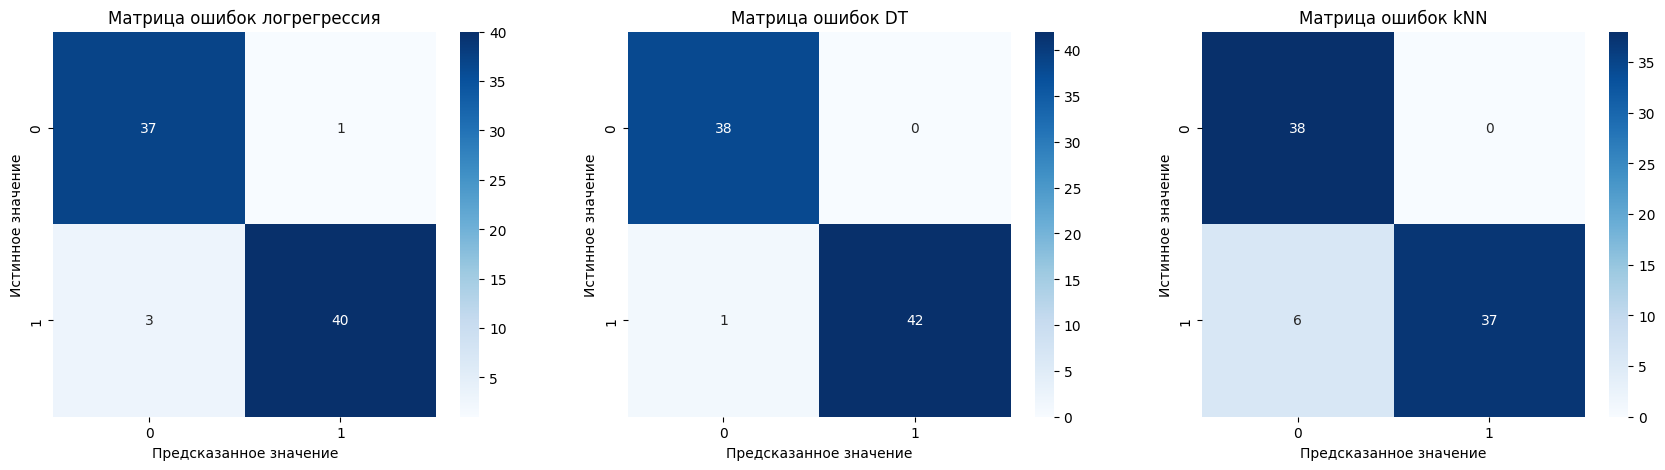

In [15]:
#Строим матрицу ошибок для модели
confus_matrix = metrics.confusion_matrix(y_test, pred_logreg)
confus_matrix1 = metrics.confusion_matrix(y_test, pred_dt)
confus_matrix2 = metrics.confusion_matrix(y_test, pred_knn)

fig, axes = plt.subplots(1, 3, figsize=(21, 5))
sns.heatmap(confus_matrix, annot=True, fmt='', cmap='Blues', ax=axes[0])
axes[0].set_title('Матрица ошибок логрегрессия')
axes[0].set_xlabel('Предсказанное значение')
axes[0].set_ylabel('Истинное значение')

sns.heatmap(confus_matrix1, annot=True, fmt='', cmap='Blues', ax=axes[1])
axes[1].set_title('Матрица ошибок DT')
axes[1].set_xlabel('Предсказанное значение')
axes[1].set_ylabel('Истинное значение')

sns.heatmap(confus_matrix2, annot=True, fmt='', cmap='Blues', ax=axes[2])
axes[2].set_title('Матрица ошибок kNN')
axes[2].set_xlabel('Предсказанное значение')
axes[2].set_ylabel('Истинное значение');

In [16]:
def plot_roc_pr_curves(true_labels, algorithms):

    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    ax[0].set_title("ROC-кривая", fontsize=20)
    ax[1].set_title("PR-кривая", fontsize=20)

    for alg_name, probabilities in algorithms.items():
        fpr, tpr, _ = roc_curve(true_labels, probabilities[:, 1])
        precisions, recalls, _ = precision_recall_curve(true_labels, probabilities[:, 1])

        ax[0].plot(
            fpr,
            tpr,
            label="{} (ROC AUC = {})".format(
                alg_name,
                round(
                    roc_auc_score(true_labels, probabilities[:, 1]),
                    3
                )
            )
        )
        ax[1].plot(
            recalls,
            precisions,
            label="{} (PR AUC = {})".format(
                alg_name,
                round(
                    average_precision_score(true_labels, probabilities[:, 1]),
                    3
                )
            )
        )

    ax[0].legend(fontsize=14)
    ax[0].set_xlabel("Ложноположительные", fontsize=16)
    ax[0].set_ylabel("Истинно положительные", fontsize=16)

    ax[1].legend(fontsize=14)
    ax[1].set_xlabel("Recall", fontsize=16)
    ax[1].set_ylabel("Precision", fontsize=16)
    plt.show()

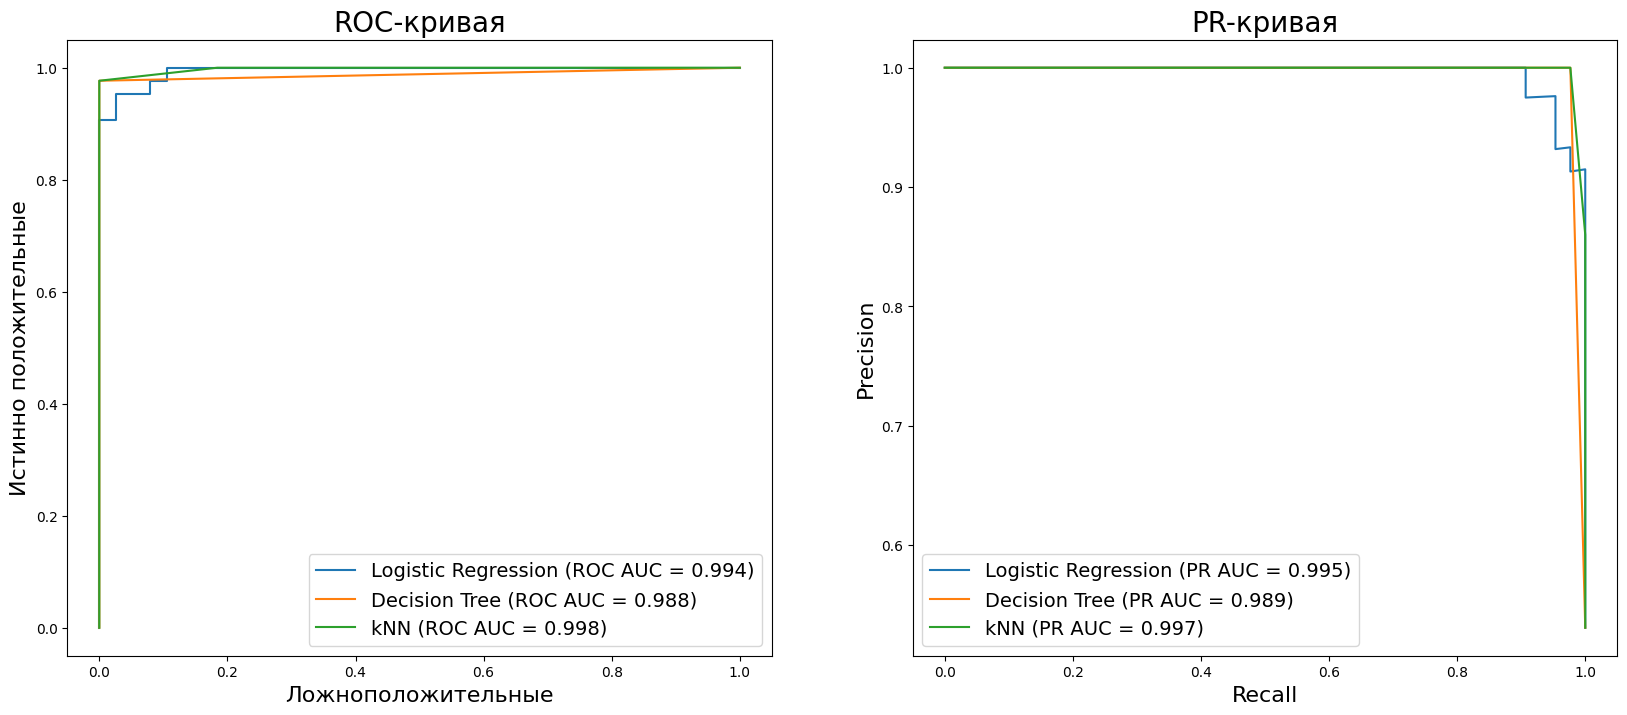

In [17]:
plot_roc_pr_curves(
    y_test,
    {
        "Logistic Regression": proba_logreg,
        "Decision Tree": proba_dt,
        "kNN": proba_knn,
    }
)

* Сагрегируем все метрики моделей

In [18]:
ans_df = pd.DataFrame(
    [all_metrics_logreg, all_metrics_dt, all_metrics_knn],
    index=["Logistic Regression", "Decision Tree", "kNN"]
)
ans_df

,Accuracy,Balanced accuracy,Precision,Recall,F1_score,ROC AUC,PR AUC,Specificity
Logistic Regression,0.950617,0.951958,0.97561,0.930233,0.952381,0.994492,0.944581,0.9737
Decision Tree,0.987654,0.988372,1.00000,0.976744,0.988235,0.988372,0.989090,1.0000
kNN,0.925926,0.930233,1.00000,0.860465,0.925000,0.997858,0.934539,1.0000


In [19]:
for metric in ans_df.columns:
    sorted_ans_df = ans_df.sort_values(by=metric, ascending=False)
    print(
        "{}:{}{}".format(
            metric,
            " " * (20 - len(metric)),
            sorted_ans_df.index.tolist()
        )
    )

Accuracy:            ['Decision Tree', 'Logistic Regression', 'kNN']
Balanced accuracy:   ['Decision Tree', 'Logistic Regression', 'kNN']
Precision:           ['Decision Tree', 'kNN', 'Logistic Regression']
Recall:              ['Decision Tree', 'Logistic Regression', 'kNN']
F1_score:            ['Decision Tree', 'Logistic Regression', 'kNN']
ROC AUC:             ['kNN', 'Logistic Regression', 'Decision Tree']
PR AUC:              ['Decision Tree', 'Logistic Regression', 'kNN']
Specificity:         ['Decision Tree', 'kNN', 'Logistic Regression']


##Подбор гиперпараметров с последующей оценкой

In [20]:
# 1. БАЗОВАЯ МОДЕЛЬ (до оптимизации)

raw_table_data = pd.read_csv('/content/drive/MyDrive/HeartDisease_Project/data/heart_clean.csv')
raw_table_data = raw_table_data.drop(['Семья', 'Возраст алког'], axis=1)
X = raw_table_data.drop(['ССЗ'], axis=1)
y = raw_table_data['ССЗ'].values
raw_table_data_columns = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Отбор признаков: SelectKBest с f_classif, k = 10 (можно подобрать, но для примера — 10)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
model = LogisticRegression(C=0.0001, penalty='l2',solver='liblinear',class_weight=None,random_state=42, max_iter=1000)
model.fit(X_train_selected, y_train)

y_pred_base = model.predict(X_test_selected)
y_proba_base = model.predict_proba(X_test_selected)
print("\n--- Метрики ДО оптимизации ---")
metrics_before = get_all_metrics(y_test, y_pred_base, y_proba_base,
                 print_metrics=True, average='binary')


# 2. ОПТИМИЗАЦИЯ ГИПЕРПАРАМЕТРОВ
param_grid = {'C': [0.005, 0.001, 0.1, 0.5, 1, 5, 10, 50, 100],'penalty': ['l1', 'l2'],
             'solver': ['liblinear', 'saga']}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000),
    param_grid, scoring='f1', cv=cv, n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# 3. МЕТРИКИ ПОСЛЕ ОПТИМИЗАЦИИ
print("\n--- Метрики ПОСЛЕ оптимизации ---")
best_model = grid_search.best_estimator_
y_pred_opt = best_model.predict(X_test_selected)
y_proba_opt = best_model.predict_proba(X_test_selected)

metrics_after = get_all_metrics(y_test, y_pred_opt, y_proba_opt,
                print_metrics=True)


# 4. СРАВНЕНИЕ (опционально красиво)
print("\n" + "="*50)
print("СРАВНЕНИЕ МЕТРИК: ДО → ПОСЛЕ")
print("="*50)
for metric in metrics_before:
    before = metrics_before[metric]
    after = metrics_after[metric]
    sign = "↑" if after > before else "↓" if after < before else "="
    print(f"{metric:<20}: {before:.4f} → {after:.4f} {sign}")

KeyError: "['Семья', 'Возраст алког'] not found in axis"

## Вклад признаков в предсказание

* Метод, который упорядочивает и визуализирует коэффициенты регрессии для каждого признака

In [21]:
def plot_imp(ssz, importance):
    order = np.argsort(importance)
    ssz = ssz[order]
    importance = importance[order]

    for idx, val in enumerate(importance):
        print(f'{ssz[idx]:40} {val:.4f}')
    plt.figure(figsize=(4, np.ceil(len(ssz) / 4)))

    plt.barh(ssz, importance)
    plt.show()

In [23]:
heart_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ЛПНП                                    405 non-null    float64
 1   Работа                                  405 non-null    int64  
 2   Пассивное курение                       405 non-null    int64  
 3   Переломы                                405 non-null    int64  
 4   ЛПВП                                    405 non-null    float64
 5   Выход на пенсию                         405 non-null    int64  
 6   Холестерин                              405 non-null    float64
 7   Артериальная гипертония                 405 non-null    int64  
 8   Триглицериды                            405 non-null    float64
 9   Гепатит                                 405 non-null    int64  
 10  Сахарный диабет                         405 non-null    int64 

In [24]:
heart_new1.drop("ССЗ", axis=1, inplace=True)

Образование                              -0.6724
Статус Курения_Курит                     -0.5237
Религия_Христианство                     -0.5083
Профессия_3                              -0.2482
Профессия_1                              -0.2431
Гепатит                                  -0.1712
Травмы за год                            -0.1428
Профессия_2                              -0.1356
Национальность_2                         -0.1348
Религия_Нет                              -0.1334
Религия_Ислам                            -0.1271
Национальность_1                         -0.0535
Сон после обеда                          -0.0472
Хроническое заболевание легких           -0.0263
Переломы                                 -0.0080
Национальность_0                         0.0291
Возраст курения                          0.0440
Национальность_3                         0.0943
Алкоголь_употребляю в настоящее время    0.0943
Работа                                   0.1159
Алкоголь_ранее употреблял

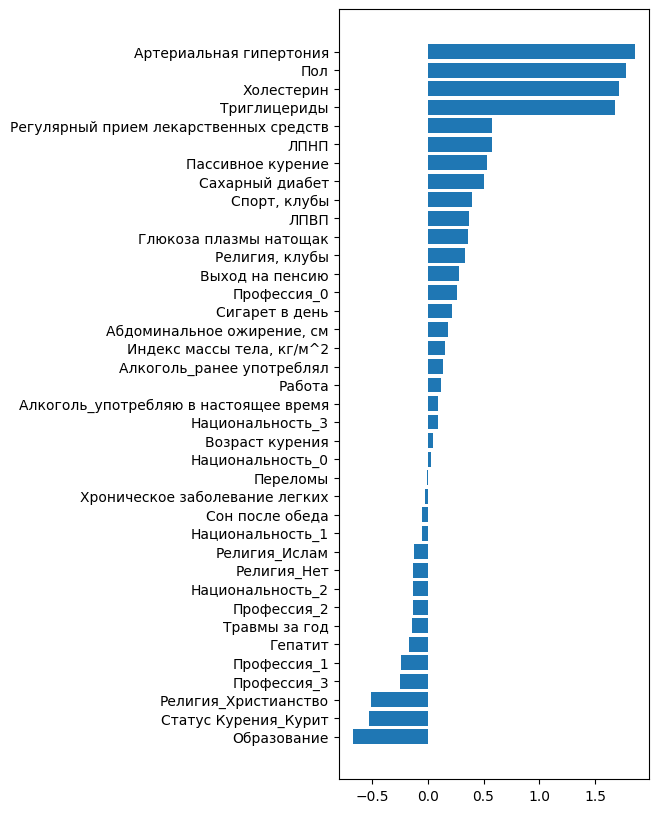

In [25]:
ssz = heart_new1.columns
plot_imp(ssz, importance_logreg)

* Выведем абсолютный вклад признаков в предсказание

Переломы                                 0.0080
Хроническое заболевание легких           0.0263
Национальность_0                         0.0291
Возраст курения                          0.0440
Сон после обеда                          0.0472
Национальность_1                         0.0535
Национальность_3                         0.0943
Алкоголь_употребляю в настоящее время    0.0943
Работа                                   0.1159
Религия_Ислам                            0.1271
Религия_Нет                              0.1334
Национальность_2                         0.1348
Профессия_2                              0.1356
Алкоголь_ранее употреблял                0.1407
Травмы за год                            0.1428
Индекс массы тела, кг/м^2                0.1521
Гепатит                                  0.1712
Абдоминальное ожирение, см               0.1837
Сигарет в день                           0.2202
Профессия_1                              0.2431
Профессия_3                             

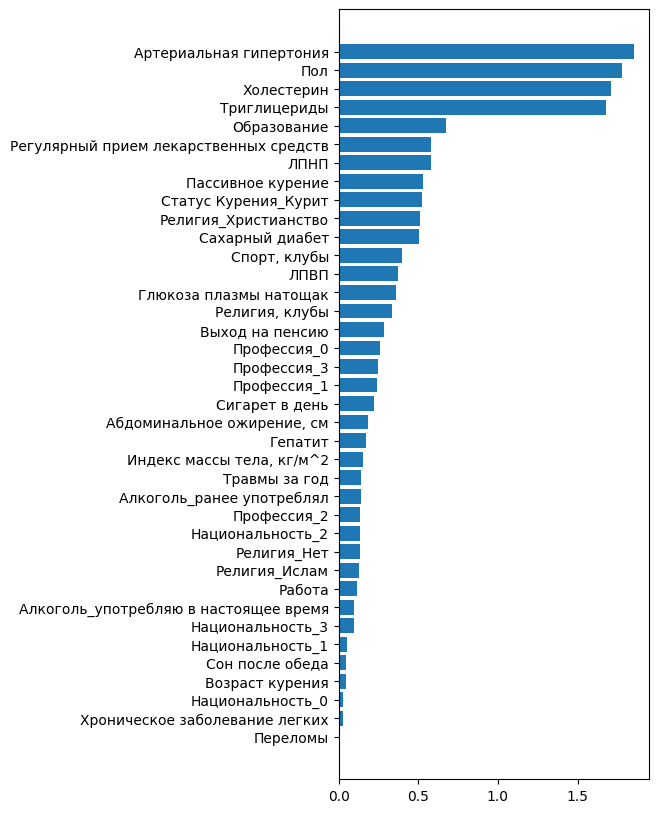

In [26]:
plot_imp(ssz, np.abs(importance_logreg))

Важность признаков, полученная с помощью Деревьев решений

ЛПНП                                     0.0000
Работа                                   0.0000
Пассивное курение                        0.0000
Переломы                                 0.0000
ЛПВП                                     0.0000
Выход на пенсию                          0.0000
Гепатит                                  0.0000
Триглицериды                             0.0000
Спорт, клубы                             0.0000
Религия, клубы                           0.0000
Сахарный диабет                          0.0000
Пол                                      0.0000
Травмы за год                            0.0000
Сон после обеда                          0.0000
Глюкоза плазмы натощак                   0.0000
Регулярный прием лекарственных средств   0.0000
Алкоголь_ранее употреблял                0.0000
Алкоголь_употребляю в настоящее время    0.0000
Религия_Христианство                     0.0000
Хроническое заболевание легких           0.0000
Индекс массы тела, кг/м^2               

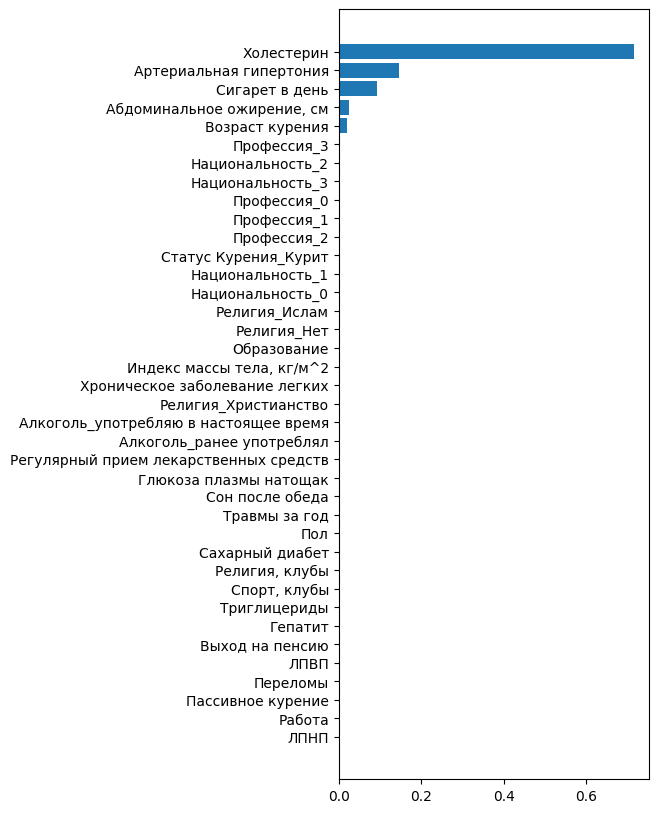

In [27]:
plot_imp(ssz, importance_dt)



---

